# Perform Principal component analysis and perform clustering using first 3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain optimum number of clusters and check whether we have obtained same number of clusters with the original data (class column we have ignored at the begining who shows it has 3 clusters)df

In [1]:
# Importing necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings        
warnings.filterwarnings("ignore")

# Reading the Data

In [2]:
wine = pd.read_csv(r'C:\Users\mukes\OneDrive\Desktop\Data Science\Assignments\PCA\wine.csv')

In [3]:
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [29]:
wine.shape

(178, 14)

In [30]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [31]:
wine.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

No missing values found.

# Normalizing Data

In [5]:
# Selecting 2nd column to 14 column
X = wine.iloc[:, 1:14].values
X.shape

(178, 13)

In [6]:
from sklearn.preprocessing import StandardScaler

# Using the standard scaler method to get the values converted
X = StandardScaler().fit_transform(X)

In [7]:
X

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

# 3D Principal Component Analysis

In [9]:
# Using Principal Component Analysis to reduce the dimensionality of the data in order to optimize the result of the clustering.
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents1 = pca.fit_transform(X)

In [10]:
pca = PCA()
pca_values = pca.fit_transform(X)
pca_values

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [37]:
principalComponents1

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01],
       [ 3.75706561e+00, -2.75637191e+00, -1.76191842e-01],
       [ 1.00890849e+00, -8.69830821e-01,  2.02668822e+00],
       [ 3.05025392e+00, -2.12240111e+00, -6.29395827e-01],
       [ 2.44908967e+00, -1.17485013e+00, -9.77094891e-01],
       [ 2.05943687e+00, -1.60896307e+00,  1.46281883e-01],
       [ 2.51087430e+00, -9.18070957e-01, -1.77096903e+00],
       [ 2.75362819e+00, -7.89437674e-01, -9.84247490e-01],
       [ 3.47973668e+00, -1.30233324e+00, -4.22735217e-01],
       [ 1.75475290e+00, -6.11977229e-01, -1.19087832e+00],
       [ 2.11346234e+00, -6.75706339e-01, -8.65086426e-01],
       [ 3.45815682e+00, -1.13062988e+00, -1.20427635e+00],
       [ 4.31278391e+00, -2.09597558e+00, -1.26391275e+00],
       [ 2.30518820e+00, -1.66255173e+00,  2.17902616e-01],
       [ 2.17195527e+00, -2.32730534e+00

In [38]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var
# The explained_variance_ratio_ attribute returns an array where each element represents the proportion of the dataset's 
# variance explained by each principal component

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [39]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var

# var1 calculates the cumulative sum of the explained variance ratio (var) and then multiplies it by 100 after rounding to four
# decimal places. This is commonly done to understand how much variance is retained as you include more principal components.

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

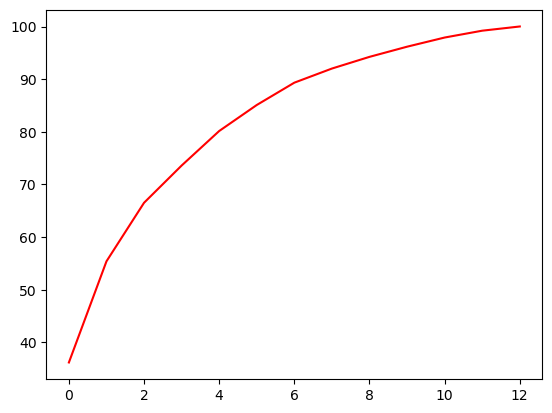

In [40]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red")

In [41]:
# Creating a dataframe featuring the three Principal components that we acquired through PCA.
PCA_1 = pd.DataFrame(data = principalComponents1, columns = ['Component_1', 'Component_2', 'Component_3'] )
PCA_1.head()

,Component_1,Component_2,Component_3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688


In [42]:
# Extracting the three features from above in order to add them to the dataframe.
principal_component1 = PCA_1['Component_1']
principal_component2 = PCA_1['Component_2']
principal_component3 = PCA_1['Component_3']

principla_component1 = PCA['Component_1']


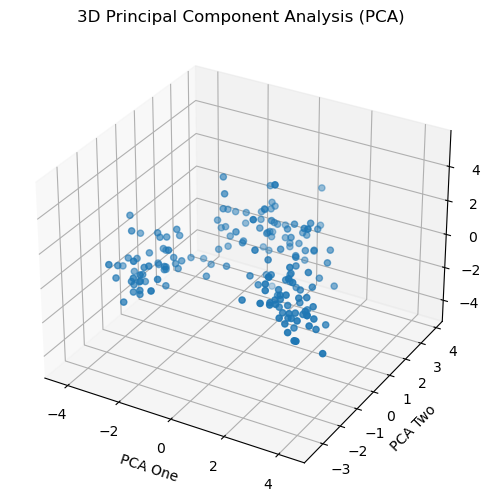

In [43]:
# Visualizing the effects of the Principal Component Analysis.
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(xs=principal_component1, ys=principal_component2, zs=principal_component3)

# labeling for each axis
ax.set_xlabel('PCA One')
ax.set_ylabel('PCA Two')
ax.set_zlabel('PCA Three')

# Title for the plot
plt.title('3D Principal Component Analysis (PCA)')

# Show the plot
plt.show()

# K Means Clustering using Elbow Method

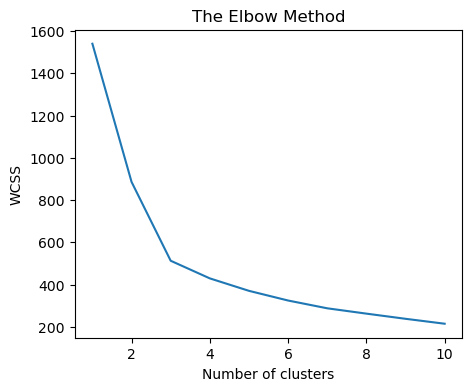

In [44]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(5, 4))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(PCA_1)       
    wcss.append(kmeans.inertia_)     # criterion based on which K-means clustering works
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')     
plt.show()

## Here, after performing k-means clustering, 3 is the optimum number of clusters obtained since there is bent at 3.

# Performing Hierarchical Clustering

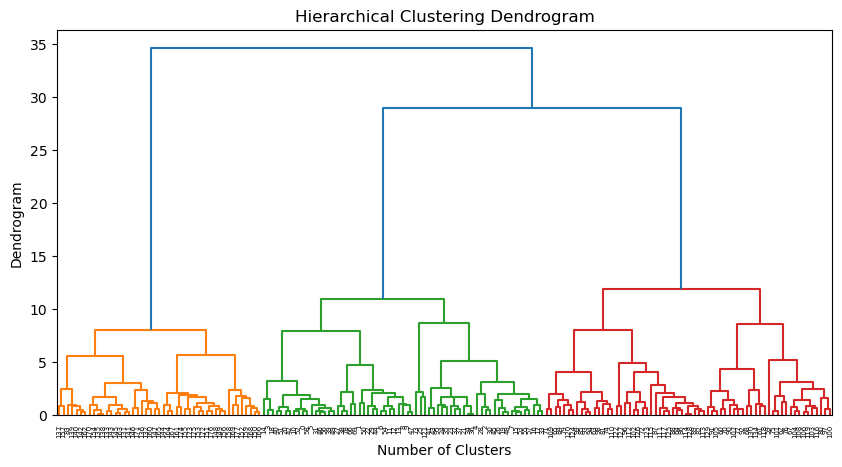

In [45]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(10,5))
linkage_matrix = linkage(PCA_1, method='ward')
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel('Number of Clusters')
plt.ylabel('Dendrogram')
plt.show()

In [46]:
from scipy.cluster.hierarchy import fcluster

threshold = 25    # Assuming an appropriate threshold height
clusters = fcluster(linkage_matrix, threshold, criterion='distance')

# 'clusters' now contains the cluster labels for each data point
print(clusters)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 2 3 3 2 3 3 3 2
 3 3 3 3 2 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


## Here, 3 is the optimum number of Cluster obtained

# Therefore, 3 is the number of Cluster obtained after using Kmeans and Hierarchical.